___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Lab - 2 (CNN) <br><br>Assignment-2 Solution<br><br>Image Classification with CNN<br><h1>


# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [3]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [4]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [6]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
# Prediction'ların doğruluğunu kontrol etmek için classes listesi oluşturduk.

In [7]:
X_train[0].shape

(28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

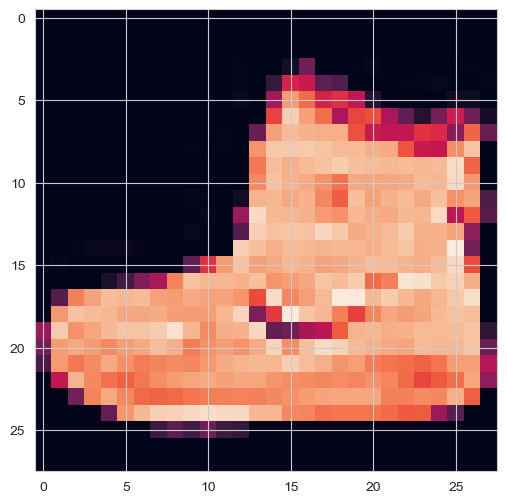

In [9]:
plt.imshow(X_train[0])
# Burada pseudo color nedeniyle sanki renkli imiş gibi görünüyor ancak gray scale bir resim.

In [10]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
y_train[0]

9

In [12]:
classes[9]

'Ankle boot'

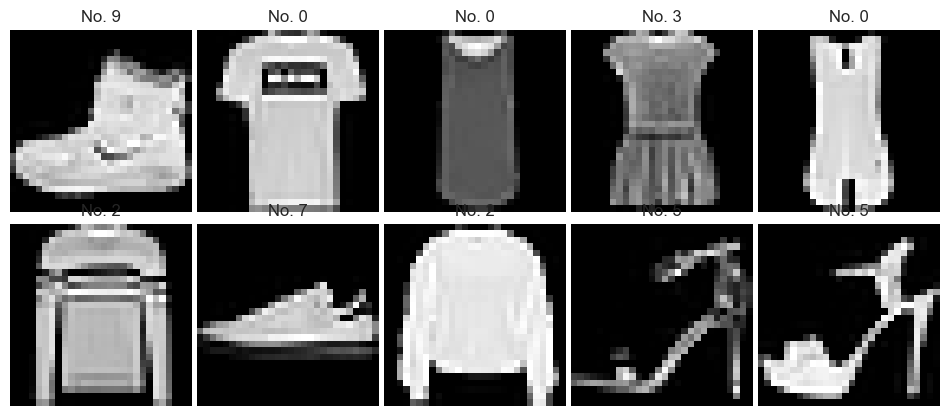

In [13]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].set_title('No. %d' % y_train[image_index])
        ax[r,c].imshow( X_train[image_index], cmap='gray')
        
plt.tight_layout()
plt.show()
plt.close()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [14]:
X_train.min()

0

In [15]:
X_train.max()

255

In [16]:
X_train = X_train/255
X_test = X_test/255

In [17]:
X_train.min()

0.0

In [18]:
X_train.max()

1.0

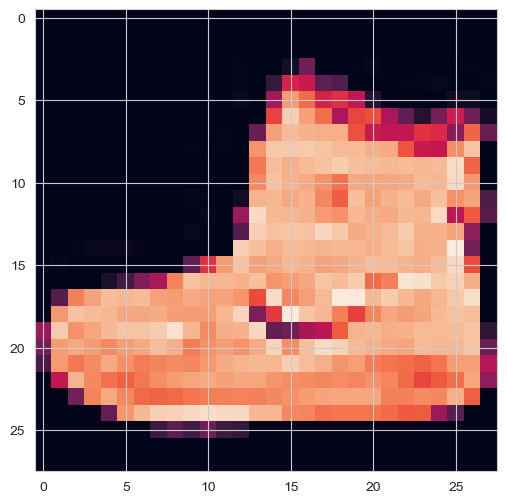

In [19]:
plt.imshow(X_train[0])

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [20]:
X_train.shape

(60000, 28, 28)

In [21]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [22]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [23]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [24]:
from tensorflow.keras.utils import to_categorical

In [25]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [26]:
y_train.shape

(60000,)

In [27]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [28]:
y_train[8]

5

In [29]:
Y_train[8]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

# Modeling

## Create The Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (3,3) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [31]:
model = Sequential()
model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2),strides=(1, 1)))
# Pool_size kaça kaç ise stride da default olarak o değer gelir. ancak burada değiştirerek (1,1) yaptık.
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))
# Softmax, toplamları 1 olacak şekilde her bir kategoriye prediction olasılık değeri ataması yapar.
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 28)     │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 25, 25, 28)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 17500)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     4,480,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,483,106 (17.10 MB)

 Trainable params: 4,483,106 (17.10 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
((3* 3 * 1) + 1) * 28

280

## Model Training

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights = True)

In [36]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 45ms/step - accuracy: 0.7993 - loss: 0.6124 - val_accuracy: 0.8902 - val_loss: 0.3080
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.8927 - loss: 0.2991 - val_accuracy: 0.8975 - val_loss: 0.2826
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.9031 - loss: 0.2650 - val_accuracy: 0.9006 - val_loss: 0.2936
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.9107 - loss: 0.2506 - val_accuracy: 0.8991 - val_loss: 0.2946
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.9178 - loss: 0.2355 - val_accuracy: 0.9038 - val_loss: 0.3019


**TASK 7: Plot values of metrics you used in your model.**

In [37]:
model.metrics_names

['loss', 'compile_metrics']

In [38]:
summary = pd.DataFrame(model.history.history)
summary.head()

,accuracy,loss,val_accuracy,val_loss
0,0.851,0.429,0.890,0.308
1,0.893,0.298,0.897,0.283
2,0.904,0.268,0.901,0.294
3,0.912,0.250,0.899,0.295
4,0.916,0.240,0.904,0.302


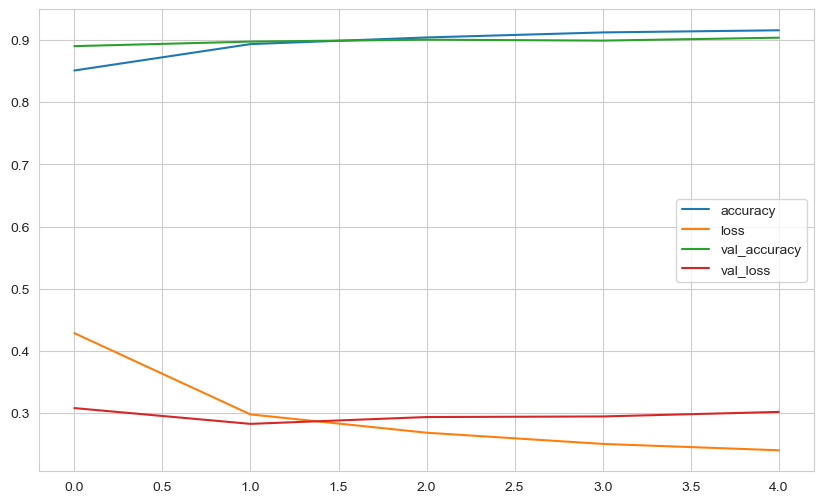

In [39]:
summary.plot();

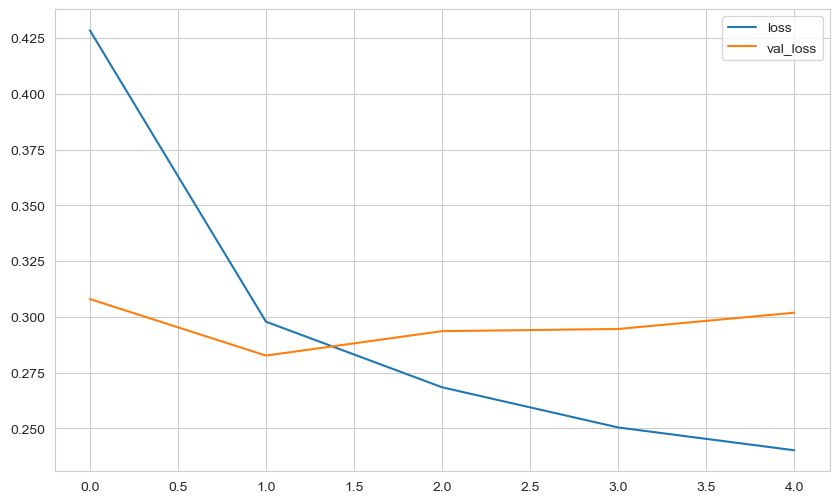

In [40]:
summary[["loss", "val_loss"]].plot();

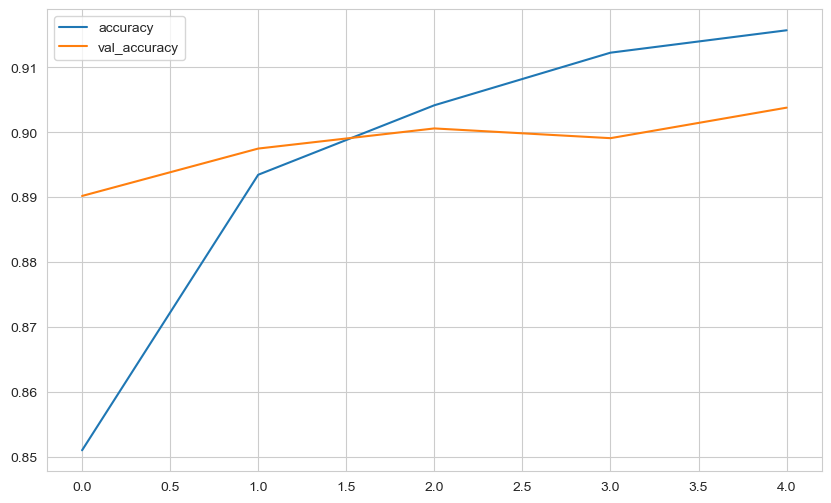

In [41]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9000 - loss: 0.2849


[0.2826284170150757, 0.8974999785423279]

In [44]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2826284170150757
Test accuracy: 0.8974999785423279


In [45]:
pred_prob = model.predict(X_test)
pred_prob

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[8.13557719e-08, 7.96330113e-09, 6.40561780e-07, ...,
        1.03505168e-04, 2.03851905e-05, 9.99841809e-01],
       [1.11747668e-05, 1.89231270e-11, 9.99980211e-01, ...,
        1.60044797e-10, 3.31497496e-10, 5.93386243e-11],
       [1.11420675e-07, 9.99999642e-01, 1.27772104e-09, ...,
        7.87400201e-10, 5.42987322e-10, 5.01187668e-11],
       ...,
       [7.32143189e-06, 2.71029843e-09, 3.61673392e-06, ...,
        2.10057280e-07, 9.99926090e-01, 9.34711437e-08],
       [1.27073577e-07, 9.99977469e-01, 3.49205975e-09, ...,
        9.24841803e-09, 2.27334951e-09, 1.18964465e-08],
       [6.03280589e-03, 9.80225974e-04, 1.24269258e-02, ...,
        8.23740438e-02, 3.41581777e-02, 1.16722360e-01]], dtype=float32)

In [46]:
pred_prob.shape

(10000, 10)

In [47]:
pred_prob[0]

array([8.1355772e-08, 7.9633011e-09, 6.4056178e-07, 8.9037101e-08,
       9.7785744e-07, 3.2224645e-05, 3.6808788e-07, 1.0350517e-04,
       2.0385191e-05, 9.9984181e-01], dtype=float32)

In [48]:
np.argmax(pred_prob[0])

9

In [49]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [50]:
y_pred.shape

(10000,)

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.82      0.85      0.83      1000
           3       0.88      0.92      0.90      1000
           4       0.81      0.85      0.83      1000
           5       0.98      0.98      0.98      1000
           6       0.80      0.62      0.70      1000
           7       0.97      0.94      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.94      0.98      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [52]:
print(confusion_matrix(y_test, y_pred))

[[897   1  20  15   2   2  57   0   6   0]
 [  4 971   1  20   2   0   1   0   1   0]
 [ 20   0 846   9  83   0  42   0   0   0]
 [ 22   5  12 920  19   0  22   0   0   0]
 [  2   1  69  42 852   1  31   0   2   0]
 [  0   0   0   0   0 977   0  11   0  12]
 [161   1  82  31  96   0 616   0  13   0]
 [  0   0   0   0   0  10   0 939   0  51]
 [  2   2   2   5   4   2   2   3 978   0]
 [  0   0   0   0   0   3   0  17   1 979]]


In [64]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

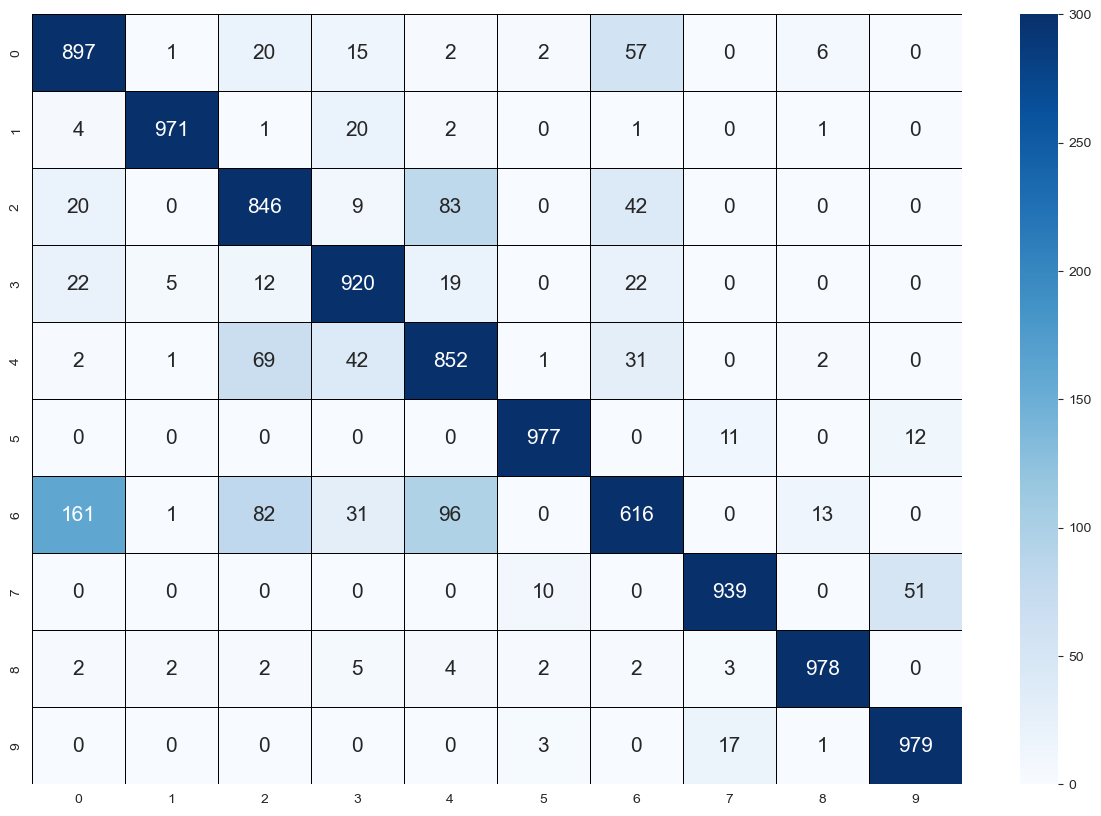

In [53]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
    vmax=300,
)
plt.show()

In [ ]:
#pullover olması gerekenlerin 83 tanesine coat demiş
#coat olması gerekenlerin 69 tanesine pullover demiş
#iyileştirme yaparken bunlar önceliğe alanıbailir
#özellikle en de en çok yanılma shirt de olmuş,161 tanesine tshirt, 82 tanesine pullover, 96 tanesine de coat demiş.
#ilk göze çarpan bunlar

In [54]:
(y_test != y_pred).sum()

1025

## Prediction

In [55]:
samples=[X_test[0], X_test[1], X_test[2]]

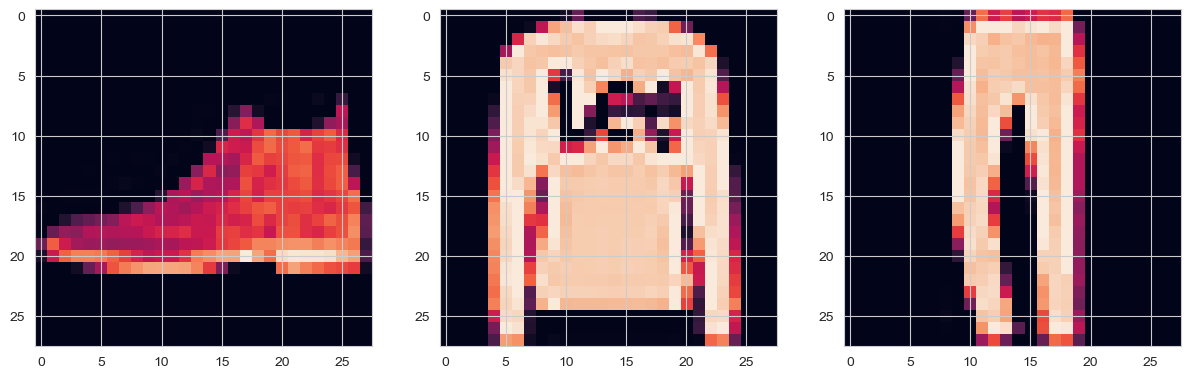

In [56]:
plt.figure(figsize = (20,5))
index=1
for i in samples:
    plt.subplot(1,4,index)
    plt.imshow(i.reshape(28,28))
    index += 1

In [57]:
samples = np.array(samples)
samples

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [58]:
samples.shape

(3, 28, 28, 1)

In [59]:
pred_prob = model.predict(samples)
pred_prob

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[8.13556156e-08, 7.96328603e-09, 6.40562973e-07, 8.90371012e-08,
        9.77855620e-07, 3.22246451e-05, 3.68088934e-07, 1.03505168e-04,
        2.03851723e-05, 9.99841809e-01],
       [1.11747668e-05, 1.89230541e-11, 9.99980211e-01, 2.87151334e-08,
        7.04404647e-06, 2.14739823e-11, 1.60902414e-06, 1.60044797e-10,
        3.31498745e-10, 5.93386243e-11],
       [1.11420469e-07, 9.99999642e-01, 1.27772104e-09, 1.03687846e-07,
        1.00093679e-07, 9.89536897e-10, 1.94611651e-08, 7.87400201e-10,
        5.42986323e-10, 5.01185760e-11]], dtype=float32)

In [60]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1], dtype=int64)

In [61]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

In [62]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [63]:
for i in y_test[:3]:
    print(classes[i])

Ankle boot
Pullover
Trouser


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___